# Direction of Arrival with freefield  synthesis 

In [3]:
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt
from mu32 import beamformer
from mu32.core import Mu32

## Globals

In [4]:
n_mics = 8
inter_mics = 0.045
sampling_frequency = 50000
duration = 1
c_angle = 0
antenna=[[0, 0, 0], n_mics, c_angle, inter_mics]

## Init beamformer

In [5]:
beams_number = 8
bfwin_duration = 0.1
G = beamformer.das_former( antenna, beams_number, sf=sampling_frequency, bfwin_duration=bfwin_duration )

## Define the post-callback function and run

In [6]:
def my_callback_end_function( mu32: Mu32 ):

	q_size = mu32.signal_q.qsize()
	if q_size== 0:
		raise Exception( 'No received data !' )

	print( f"got {q_size} transfer buffers from {mu32.mems_number} microphones" )	

	"""
	get queued signals from Mu32
	"""
	signal = []
	for _ in range( q_size ):
		signal = np.append( signal, mu32.signal_q.get( block=False ) )

	signal = signal.reshape( mu32.buffer_length * q_size, mu32.mems_number )/0x7fffff
	powers, beams_number = beamformer.das_doa( G, signal.T, sf=sampling_frequency, bfwin_duration=bfwin_duration )

	"""
	plot the first frame power on every channels
	"""
	plt.bar( np.array( range(beams_number) ), powers[:,0] )



got 106 transfer buffers from 8 microphones


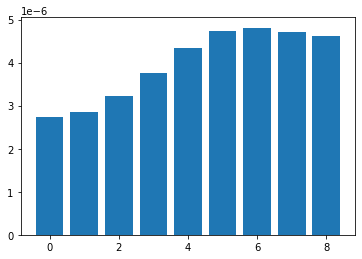

In [7]:
try:
	mu32 = Mu32()
	mu32.run( 
		post_callback_fn=my_callback_end_function, 	# the user defined data processing function
		mems=(0, 1, 2, 3, 4, 5, 6, 7),				# activated mems	
		duration = 1		
	)
except:
	print( 'aborting' )